<a href="https://colab.research.google.com/github/subandwho/tensorflow/blob/main/transferlearning_scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2021-07-17 08:14:41--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-07-17 08:14:41 (101 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [8]:
from helper_functions import create_tensorboard_callback, unzip_data, plot_loss_curves, compare_historys, walk_through_dir

In [9]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip

--2021-07-17 08:14:44--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.164.144, 142.250.81.208, 142.250.73.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.164.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip’

101_food_classes_10 100%[===================>]   1.51G   215MB/s    in 6.7s    

2021-07-17 08:14:51 (233 MB/s) - ‘101_food_classes_10_percent.zip’ saved [1625420029/1625420029]



In [10]:
unzip_data('101_food_classes_10_percent.zip')
train_dir = '101_food_classes_10_percent/train/'
test_dir = '101_food_classes_10_percent/test/'


In [11]:
walk_through_dir('101_food_classes_10_percent')

There are 2 directories and 0 images in '101_food_classes_10_percent'.
There are 101 directories and 0 images in '101_food_classes_10_percent/test'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/seaweed_salad'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/pork_chop'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/baklava'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/macaroni_and_cheese'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/hot_dog'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/foie_gras'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/beef_carpaccio'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/falafel'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/greek_salad'.
There are 0 directories and 250 images in '1

In [12]:
import tensorflow as tf
initial_epochs = 5
img_size = (224, 224)
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir, image_size = img_size, batch_size = 32, label_mode = 'categorical')
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir, image_size = img_size, batch_size = 32, label_mode='categorical', shuffle = False)


Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


In [13]:
checkpoint_path = "101_classes_10_percent_checkpoint"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, monitor = 'val_loss', save_weights_only = True, save_best_only = True)


In [14]:
from tensorflow.keras import layers



In [15]:
from tensorflow.keras.layers.experimental import preprocessing



In [16]:
data_augmented = tf.keras.models.Sequential([
                                             preprocessing.RandomFlip('horizontal'),
                                             preprocessing.RandomRotation(0.2),
                                             preprocessing.RandomHeight(0.2),
                                             preprocessing.RandomWidth(0.2),
                                             preprocessing.RandomZoom(0.2)], 
                                            name = 'data_augmentation_layer')

In [17]:
from tensorflow.keras.models import Sequential

In [18]:
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False
inputs = layers.Input(shape = (224, 224, 3), name='Input Layer')
x = data_augmented(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name='average_pooling_layer')(x)
output = layers.Dense(len(train_data.class_names), activation='softmax', name='output_layer')(x)
model_1 = tf.keras.Model(inputs, output)


16711680/16705208 [==============================] - 0s 0us/step


In [19]:
model_1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input Layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
data_augmentation_layer (Seq (None, None, None, 3)     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
average_pooling_layer (Globa (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 101)               129381    
Total params: 4,178,952
Trainable params: 129,381
Non-trainable params: 4,049,571
_________________________________________________________________


In [20]:
model_1.compile(loss='categorical_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])
history_1 = model_1.fit(train_data, epochs = initial_epochs, 
            validation_data = test_data,
            validation_steps=(0.15 * len(test_data)), callbacks=[checkpoint_callback])

Epoch 1/5
237/237 [==============================] - 121s 360ms/step - loss: 3.4782 - accuracy: 0.2432 - val_loss: 2.6800 - val_accuracy: 0.4015
Epoch 2/5
237/237 [==============================] - 73s 306ms/step - loss: 2.3503 - accuracy: 0.4623 - val_loss: 2.2646 - val_accuracy: 0.4514
Epoch 3/5
237/237 [==============================] - 66s 279ms/step - loss: 1.9741 - accuracy: 0.5266 - val_loss: 2.0608 - val_accuracy: 0.4814
Epoch 4/5
237/237 [==============================] - 64s 270ms/step - loss: 1.7713 - accuracy: 0.5691 - val_loss: 2.0077 - val_accuracy: 0.4863
Epoch 5/5
237/237 [==============================] - 59s 246ms/step - loss: 1.5974 - accuracy: 0.6098 - val_loss: 1.9444 - val_accuracy: 0.5003


In [21]:
fine_tuning_results = model_1.evaluate(test_data)

790/790 [==============================] - 89s 112ms/step - loss: 1.7063 - accuracy: 0.5541


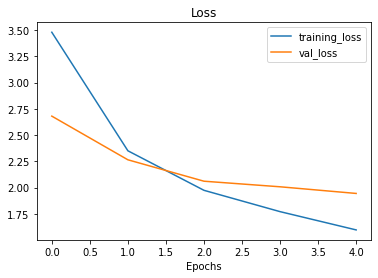

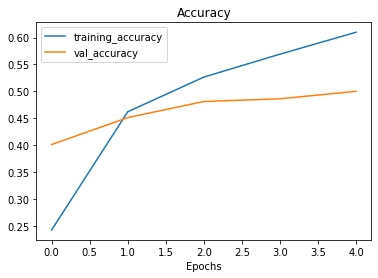

In [22]:
plot_loss_curves(history_1)

In [23]:
base_model.trainable = True
for layer in base_model.layers[:-5]:
  layer.trainable = False


In [24]:
model_1.compile(loss='categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
              metrics = ['accuracy'])


In [25]:
for layer in model_1.layers:
  print(layer.name, layer.trainable)

Input Layer True
data_augmentation_layer True
efficientnetb0 True
average_pooling_layer True
output_layer True


In [26]:
history_2 = model_1.fit(train_data, epochs = initial_epochs+5, validation_data = test_data, callbacks = [checkpoint_callback],
                        initial_epoch = history_1.epoch[-1],
                        validation_steps = int(0.15* len(test_data)))

Epoch 5/10
237/237 [==============================] - 67s 254ms/step - loss: 1.3708 - accuracy: 0.6484 - val_loss: 1.8682 - val_accuracy: 0.5183
Epoch 6/10
237/237 [==============================] - 54s 228ms/step - loss: 1.2442 - accuracy: 0.6776 - val_loss: 1.8534 - val_accuracy: 0.5201
Epoch 7/10
237/237 [==============================] - 55s 230ms/step - loss: 1.1500 - accuracy: 0.6974 - val_loss: 1.7847 - val_accuracy: 0.5384
Epoch 8/10
237/237 [==============================] - 54s 227ms/step - loss: 1.0937 - accuracy: 0.7093 - val_loss: 1.8478 - val_accuracy: 0.5249
Epoch 9/10
237/237 [==============================] - 52s 219ms/step - loss: 1.0239 - accuracy: 0.7299 - val_loss: 1.8393 - val_accuracy: 0.5326
Epoch 10/10
237/237 [==============================] - 50s 212ms/step - loss: 0.9839 - accuracy: 0.7399 - val_loss: 1.8363 - val_accuracy: 0.5315


In [27]:
fine_tuning_results_2 = model_1.evaluate(test_data)

790/790 [==============================] - 89s 113ms/step - loss: 1.6032 - accuracy: 0.5785


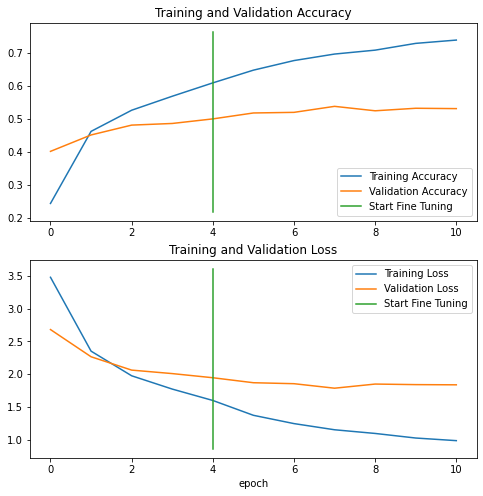

In [28]:
compare_historys(original_history = history_1, new_history= history_2, initial_epochs = 5)

In [29]:
preds_probs = model_1.predict(test_data, verbose = 1)

790/790 [==============================] - 62s 77ms/step


In [30]:
preds_probs[:10]

array([[2.6777518e-01, 1.0965961e-04, 2.3348060e-01, ..., 7.3899770e-05,
        3.9996882e-04, 6.1072212e-02],
       [8.6876112e-01, 3.7337196e-07, 3.5758170e-03, ..., 3.0955502e-03,
        5.1571095e-07, 2.3933242e-06],
       [4.4793147e-01, 8.2022976e-03, 1.3980058e-02, ..., 1.1635739e-03,
        3.5991255e-04, 3.4108167e-03],
       ...,
       [4.0683606e-01, 1.1941227e-05, 3.0142784e-03, ..., 8.0543093e-02,
        5.1271694e-04, 6.3582142e-05],
       [2.1983972e-01, 4.6496367e-04, 2.0126414e-01, ..., 1.8308166e-04,
        1.0151585e-04, 6.4770447e-04],
       [5.4254973e-01, 4.3021028e-06, 2.0887672e-03, ..., 1.5699368e-02,
        5.2708951e-06, 4.1914559e-03]], dtype=float32)

In [31]:
pred_classes = preds_probs.argmax(axis=1)
pred_classes[:10]

array([ 0,  0,  0,  0, 29, 78, 29,  0,  9,  0])

In [32]:
ylabels = []
for images, labels in test_data.unbatch():
  ylabels.append(labels.numpy().argmax())

In [33]:
ylabels[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [34]:
from sklearn.metrics import accuracy_score
sklearn_accuracy = accuracy_score(y_true=ylabels,
                                  y_pred = pred_classes)
sklearn_accuracy

0.5784950495049505

In [35]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ### Added: Rotate xticks for readability & increase font size (required due to such a large confusion matrix)
  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

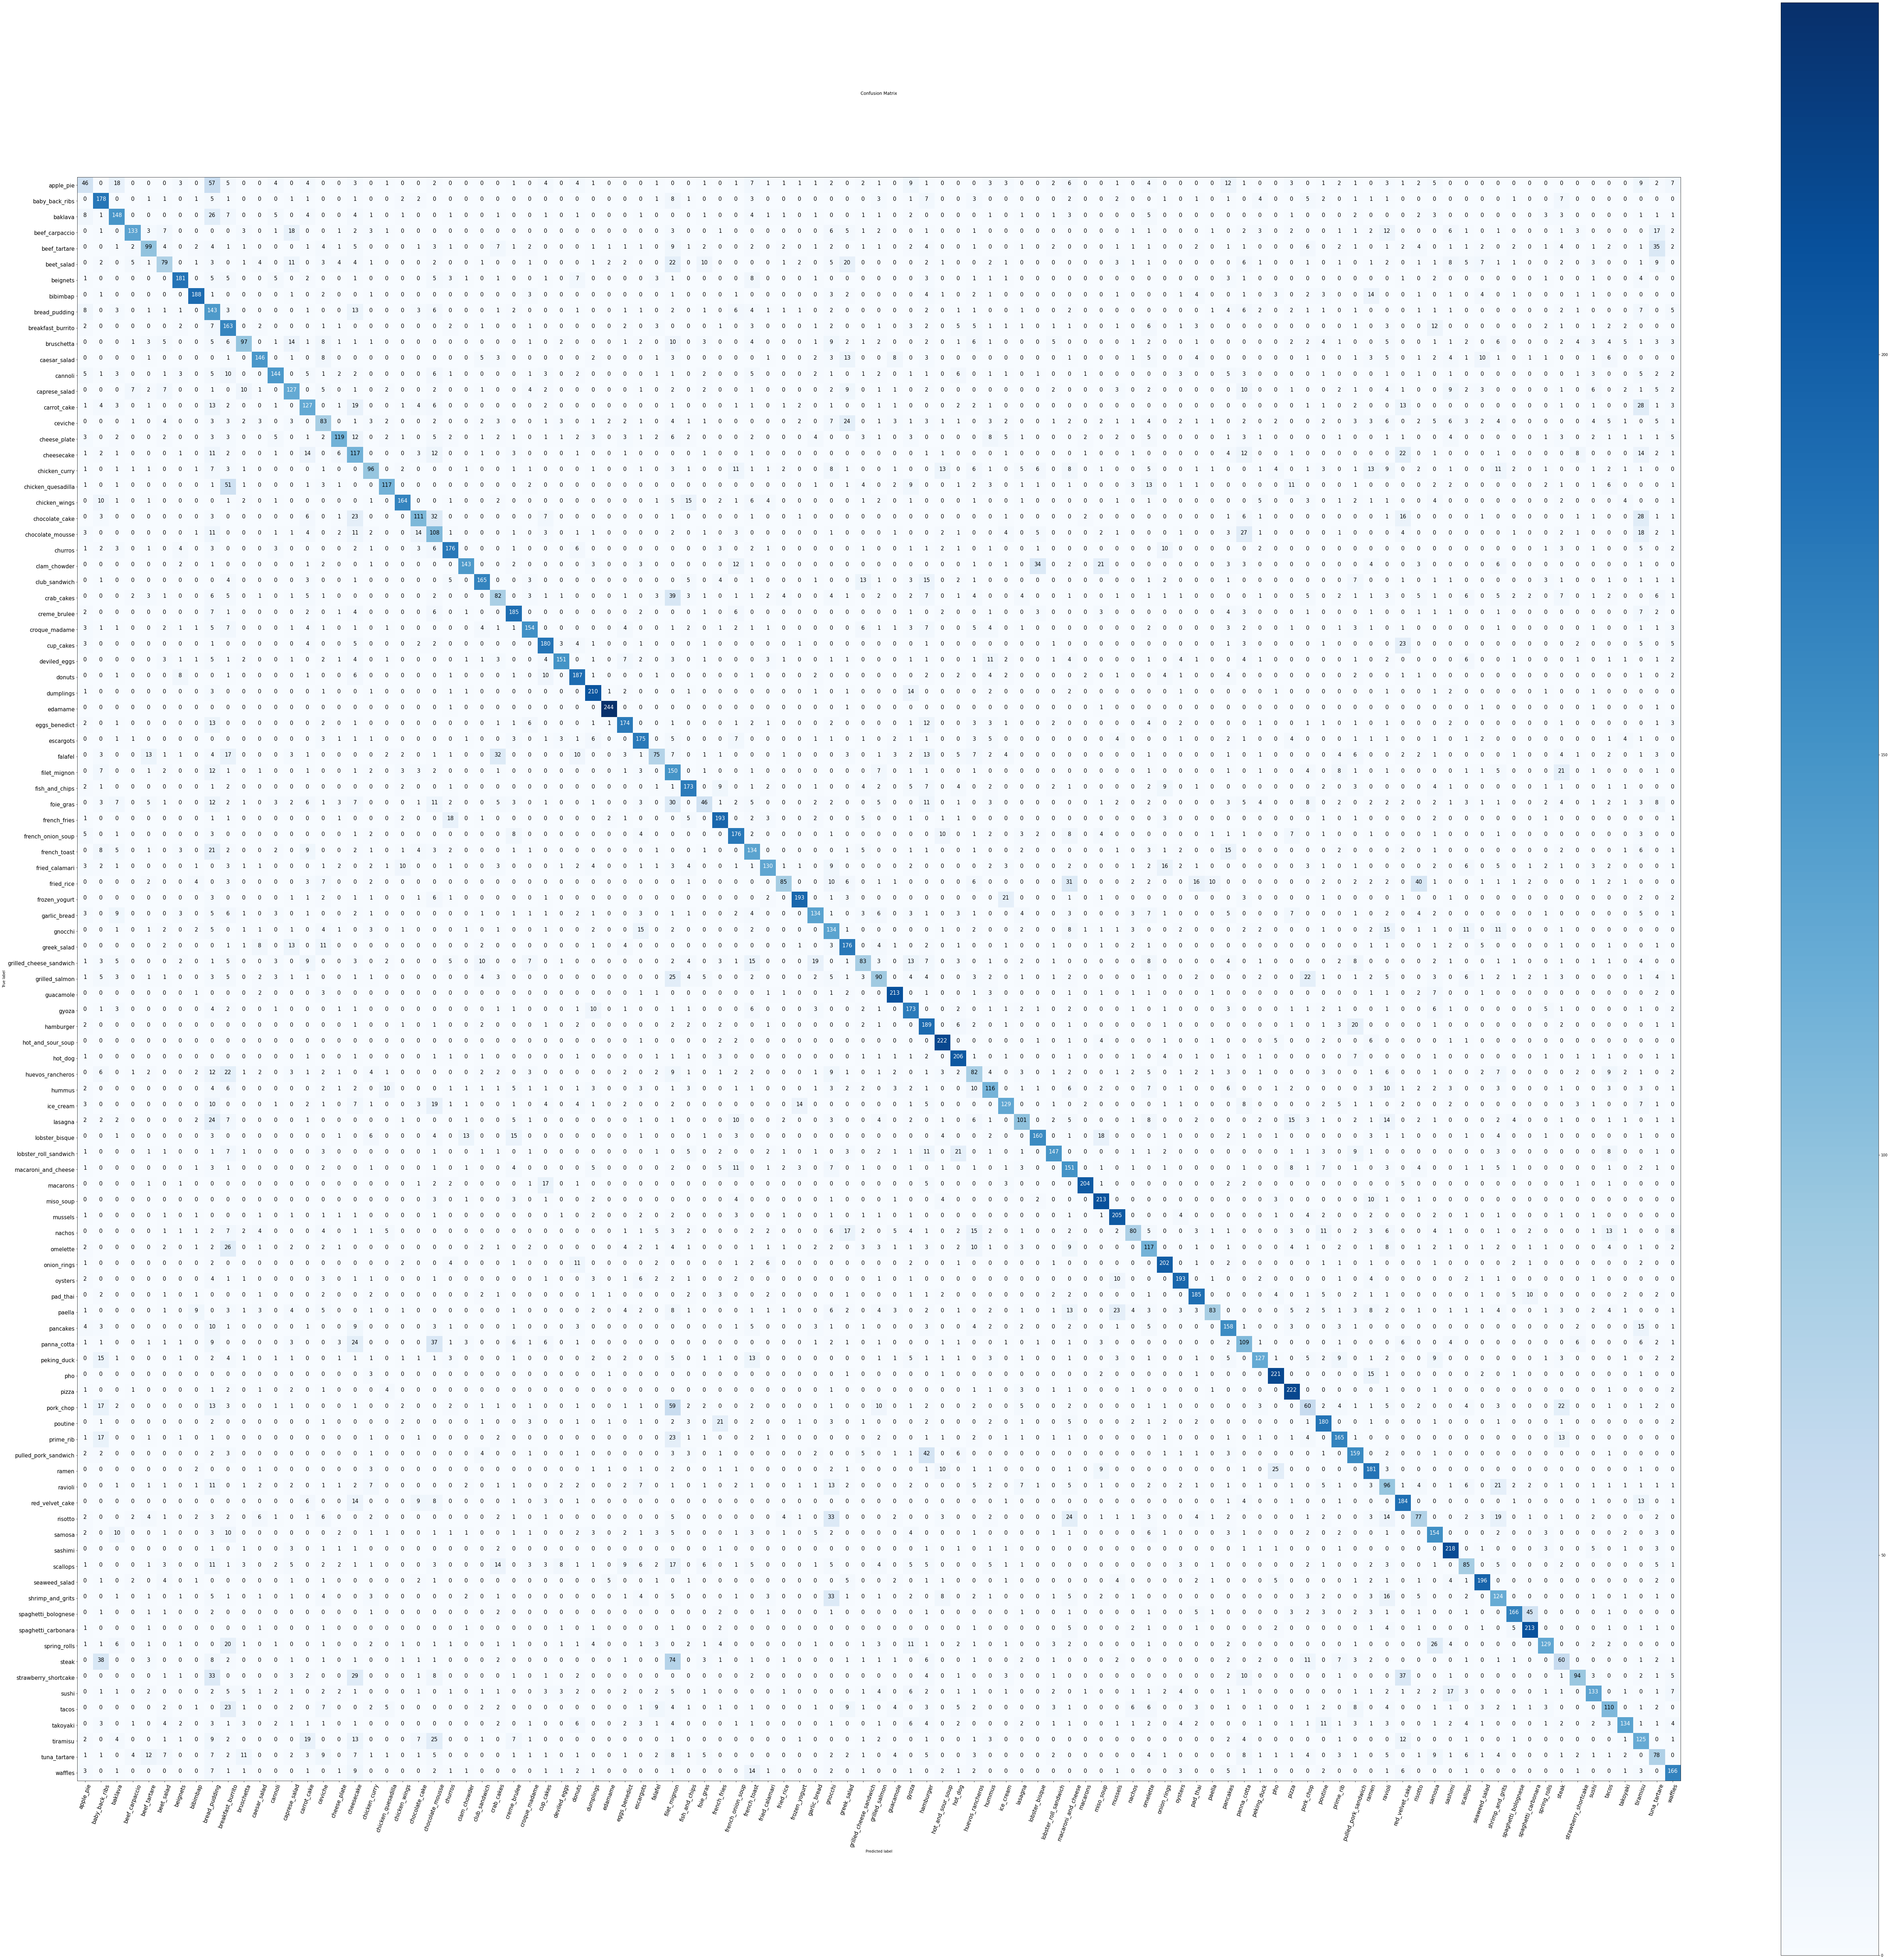

In [36]:


make_confusion_matrix(y_true = ylabels, y_pred = pred_classes, classes = test_data.class_names, figsize = (100, 100))

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_true = ylabels, y_pred = pred_classes))

              precision    recall  f1-score   support

           0       0.31      0.18      0.23       250
           1       0.51      0.71      0.59       250
           2       0.58      0.59      0.59       250
           3       0.81      0.53      0.64       250
           4       0.57      0.40      0.47       250
           5       0.49      0.32      0.39       250
           6       0.80      0.72      0.76       250
           7       0.82      0.75      0.78       250
           8       0.22      0.57      0.32       250
           9       0.33      0.65      0.44       250
          10       0.61      0.39      0.47       250
          11       0.74      0.58      0.65       250
          12       0.73      0.58      0.64       250
          13       0.53      0.51      0.52       250
          14       0.48      0.51      0.50       250
          15       0.36      0.33      0.35       250
          16       0.70      0.48      0.57       250
          17       0.30    

In [38]:
classification_report_dict = classification_report(y_true = ylabels, y_pred = pred_classes, output_dict = True)
classification_report_dict

{'0': {'f1-score': 0.22999999999999998,
  'precision': 0.30666666666666664,
  'recall': 0.184,
  'support': 250},
 '1': {'f1-score': 0.5913621262458473,
  'precision': 0.5056818181818182,
  'recall': 0.712,
  'support': 250},
 '10': {'f1-score': 0.4743276283618582,
  'precision': 0.610062893081761,
  'recall': 0.388,
  'support': 250},
 '100': {'f1-score': 0.6287878787878788,
  'precision': 0.5971223021582733,
  'recall': 0.664,
  'support': 250},
 '11': {'f1-score': 0.6532438478747203,
  'precision': 0.7411167512690355,
  'recall': 0.584,
  'support': 250},
 '12': {'f1-score': 0.6428571428571429,
  'precision': 0.7272727272727273,
  'recall': 0.576,
  'support': 250},
 '13': {'f1-score': 0.5183673469387754,
  'precision': 0.5291666666666667,
  'recall': 0.508,
  'support': 250},
 '14': {'f1-score': 0.49512670565302147,
  'precision': 0.4828897338403042,
  'recall': 0.508,
  'support': 250},
 '15': {'f1-score': 0.3472803347280335,
  'precision': 0.36403508771929827,
  'recall': 0.332,


In [39]:
class_names = test_data.class_names

In [40]:
class_f1_scores = {}
# Loop through classification report items
for k, v in classification_report_dict.items():
  if k == "accuracy": # stop once we get to accuracy key
    break
  else:
    # Append class names and f1-scores to new dictionary
    class_f1_scores[class_names[int(k)]] = v["f1-score"]
class_f1_scores

{'apple_pie': 0.22999999999999998,
 'baby_back_ribs': 0.5913621262458473,
 'baklava': 0.5873015873015873,
 'beef_carpaccio': 0.6425120772946861,
 'beef_tartare': 0.46588235294117647,
 'beet_salad': 0.3853658536585366,
 'beignets': 0.7589098532494759,
 'bibimbap': 0.7849686847599165,
 'bread_pudding': 0.3195530726256983,
 'breakfast_burrito': 0.43524699599465955,
 'bruschetta': 0.4743276283618582,
 'caesar_salad': 0.6532438478747203,
 'cannoli': 0.6428571428571429,
 'caprese_salad': 0.5183673469387754,
 'carrot_cake': 0.49512670565302147,
 'ceviche': 0.3472803347280335,
 'cheese_plate': 0.568019093078759,
 'cheesecake': 0.36448598130841126,
 'chicken_curry': 0.4528301886792453,
 'chicken_quesadilla': 0.5721271393643031,
 'chicken_wings': 0.722466960352423,
 'chocolate_cake': 0.516279069767442,
 'chocolate_mousse': 0.3540983606557377,
 'churros': 0.7082494969818913,
 'clam_chowder': 0.6682242990654205,
 'club_sandwich': 0.7006369426751592,
 'crab_cakes': 0.37104072398190047,
 'creme_brul

In [41]:
import pandas as pd
f1_score_df = pd.DataFrame({"class_names": list(class_f1_scores.keys()),
                            "f1-score": list(class_f1_scores.values())}).sort_values("f1-score", ascending = False)
f1_score_df

,class_names,f1-score
33,edamame,0.953125
63,macarons,0.875536
75,pho,0.832392
51,guacamole,0.819231
45,frozen_yogurt,0.810924
...,...,...
8,bread_pudding,0.319553
77,pork_chop,0.280374
93,steak,0.266667
39,foie_gras,0.259155


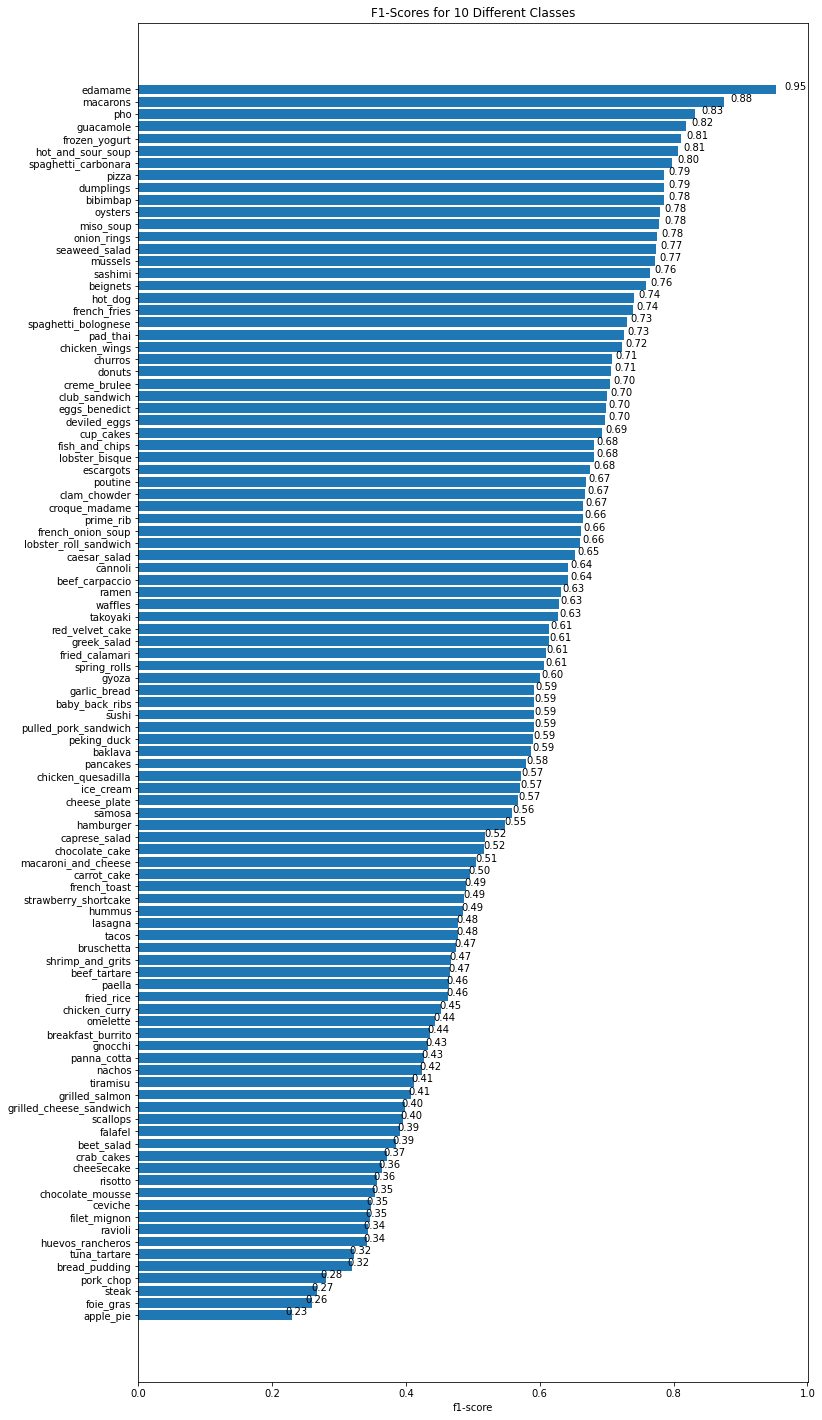

In [42]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 25))
scores = ax.barh(range(len(f1_score_df)), f1_score_df["f1-score"].values)
ax.set_yticks(range(len(f1_score_df)))
ax.set_yticklabels(list(f1_score_df["class_names"]))
ax.set_xlabel("f1-score")
ax.set_title("F1-Scores for 10 Different Classes")
ax.invert_yaxis(); # reverse the order

def autolabel(rects): # Modified version of: https://matplotlib.org/examples/api/barchart_demo.html
  """
  Attach a text label above each bar displaying its height (it's value).
  """
  for rect in rects:
    width = rect.get_width()
    ax.text(1.03*width, rect.get_y() + rect.get_height()/1.5,
            f"{width:.2f}",
            ha='center', va='bottom')

autolabel(scores)

In [59]:
def load_prep_image(filename, img_shape = 224, scale = True):
  img = tf.io.read_file(filename)
  img = tf.io.decode_image(img, channels = 3)
  img = tf.image.resize(img, (224, 224))
  if scale:
    return img/255.
  else:
    return img  

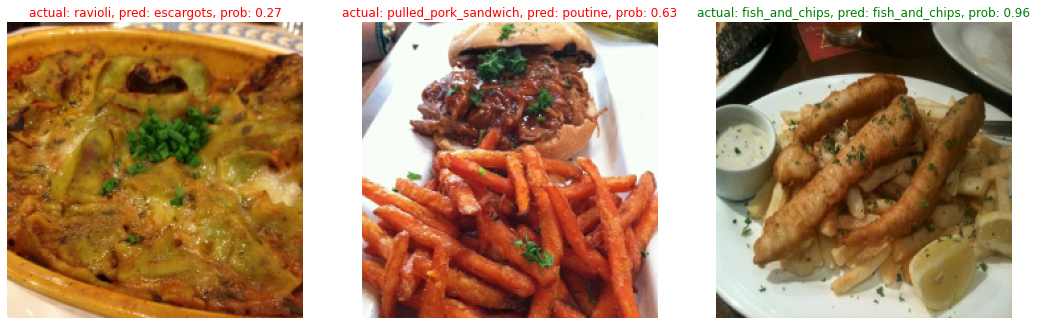

In [63]:
import os
import random

plt.figure(figsize=(18, 10))
for i in range(3):
  # Choose a random image from a random class 
  class_name = random.choice(class_names)
  filename = random.choice(os.listdir(test_dir + "/" + class_name))
  filepath = test_dir + class_name + "/" + filename

  # Load the image and make predictions
  img = load_prep_image(filepath, scale=False) # don't scale images for EfficientNet predictions
  pred_prob = model_1.predict(tf.expand_dims(img, axis=0)) # model accepts tensors of shape [None, 224, 224, 3]
  pred_class = class_names[pred_prob.argmax()] # find the predicted class 

  # Plot the image(s)
  plt.subplot(1, 3, i+1)
  plt.imshow(img/255.)
  if class_name == pred_class: # Change the color of text based on whether prediction is right or wrong
    title_color = "g"
  else:
    title_color = "r"
  plt.title(f"actual: {class_name}, pred: {pred_class}, prob: {pred_prob.max():.2f}", c=title_color)
  plt.axis(False);

In [64]:
filepaths = []
for filepath in test_data.list_files("/content/101_food_classes_10_percent/test/*/*.jpg", shuffle = False):
  filepaths.append(filepath.numpy())

filepaths[:10]

[b'/content/101_food_classes_10_percent/test/apple_pie/1011328.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/101251.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1034399.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/103801.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1038694.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1047447.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1068632.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/110043.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1106961.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1113017.jpg']

In [71]:
import pandas as pd
pred_df = pd.DataFrame({"img_path":filepaths,
                        "y_true": ylabels,
                        "y_predicted":pred_classes,
                        "pred_conf": preds_probs.max(axis=1),
                        "y_true_classname":[class_names[i] for i in ylabels],
                        "y_pred_classes": [class_names[i] for i in pred_classes]})
pred_df['pred_correct'] = pred_df['y_true'] == pred_df['y_predicted']
pred_df

,img_path,y_true,y_predicted,pred_conf,y_true_classname,y_pred_classes,pred_correct
0,b'/content/101_food_classes_10_percent/test/ap...,0,0,0.267775,apple_pie,apple_pie,True
1,b'/content/101_food_classes_10_percent/test/ap...,0,0,0.868761,apple_pie,apple_pie,True
2,b'/content/101_food_classes_10_percent/test/ap...,0,0,0.447931,apple_pie,apple_pie,True
3,b'/content/101_food_classes_10_percent/test/ap...,0,0,0.156461,apple_pie,apple_pie,True
4,b'/content/101_food_classes_10_percent/test/ap...,0,29,0.266696,apple_pie,cup_cakes,False
...,...,...,...,...,...,...,...
25245,b'/content/101_food_classes_10_percent/test/wa...,100,100,0.975769,waffles,waffles,True
25246,b'/content/101_food_classes_10_percent/test/wa...,100,16,0.505744,waffles,cheese_plate,False
25247,b'/content/101_food_classes_10_percent/test/wa...,100,100,0.717904,waffles,waffles,True
25248,b'/content/101_food_classes_10_percent/test/wa...,100,100,0.413351,waffles,waffles,True


In [73]:
top_100_wrong = pred_df[pred_df['pred_correct']==False].sort_values("pred_conf", ascending = False)
top_100_wrong

,img_path,y_true,y_predicted,pred_conf,y_true_classname,y_pred_classes,pred_correct
23797,b'/content/101_food_classes_10_percent/test/su...,95,86,0.999869,sushi,sashimi,False
23631,b'/content/101_food_classes_10_percent/test/st...,94,83,0.999557,strawberry_shortcake,red_velvet_cake,False
18001,b'/content/101_food_classes_10_percent/test/pa...,72,67,0.997453,pancakes,omelette,False
22203,b'/content/101_food_classes_10_percent/test/se...,88,51,0.996437,seaweed_salad,guacamole,False
22511,b'/content/101_food_classes_10_percent/test/sp...,90,78,0.996317,spaghetti_bolognese,poutine,False
...,...,...,...,...,...,...,...
9374,b'/content/101_food_classes_10_percent/test/fi...,37,79,0.094570,filet_mignon,prime_rib,False
4012,b'/content/101_food_classes_10_percent/test/ch...,16,72,0.089961,cheese_plate,pancakes,False
18841,b'/content/101_food_classes_10_percent/test/ph...,75,82,0.086787,pho,ravioli,False
6277,b'/content/101_food_classes_10_percent/test/cl...,25,9,0.080151,club_sandwich,breakfast_burrito,False


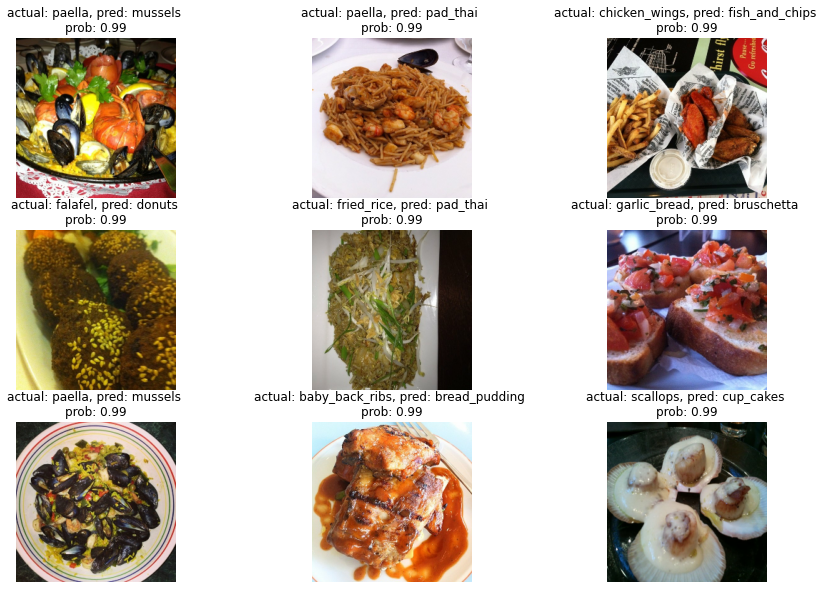

In [77]:
images_to_view = 9
start_index = 10 # change the start index to view more
plt.figure(figsize=(15, 10))
for i, row in enumerate(top_100_wrong[start_index:start_index+images_to_view].itertuples()): 
  plt.subplot(3, 3, i+1)
  img = load_prep_image(row[1], scale=True)
  _, _, _, _, pred_prob, y_true, y_pred, _ = row # only interested in a few parameters of each row
  plt.imshow(img)
  plt.title(f"actual: {y_true}, pred: {y_pred} \nprob: {pred_prob:.2f}")
  plt.axis(False)